Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. Compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. Be sure to vary the hyperparameters of your MLP!

__Column Header Key:__
- school- Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex- Student's sex (binary: 'F' - female or 'M' - male)
- age- Student's age (numeric: from 15 to 22)
- address- Student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize- Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
- Pstatus- Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)  
- Medu- Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)  
- Fedu- Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
- Mjob- Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
- Fjob- Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
- reason- Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
- guardian- Student's guardian (nominal: 'mother', 'father' or 'other')  
- traveltime- Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
- studytime- Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
- failures- Number of past class failures (numeric: n if 1<=n<3, else 4)  
- schoolsup- Extra educational support (binary: yes or no)  
- famsup- Family educational support (binary: yes or no)  
- paid- Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
- activities- Extra-curricular activities (binary: yes or no)  
- nursery- Attended nursery school (binary: yes or no)  
- higher- Wants to take higher education (binary: yes or no)  
- internet- Internet access at home (binary: yes or no)  
- romantic- With a romantic relationship (binary: yes or no)
- famrel- Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime- Free time after school (numeric: from 1 - very low to 5 - very high)
- goout- Going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc- Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc- Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health- Current health status (numeric: from 1 - very bad to 5 - very good)
- absences- Number of school absences (numeric: from 0 to 93)
- G1- First period grade (numeric: from 0 to 20)
- G2- Second period grade (numeric: from 0 to 20)
- G3- Final grade (numeric: from 0 to 20, output target)

### Source Information
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th Future Business Technology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

In [1]:
# import all the modules I need
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt  # side-stepping mpl backend
import matplotlib.gridspec as gridspec  # subplots
import seaborn as sns
sns.set(style="whitegrid")

# Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC  # support vector classification
from sklearn.cross_validation import KFold  # For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import the data tables I downloaded
df = pd.DataFrame()

# responses from the Portuguese language class students
df = pd.read_csv("student-por.csv")

# styling so I can see all the columns
pd.set_option('display.max_columns', 150)
plt.style.use('bmh')
from IPython.display import display

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Visualize our dataframe for the first time
print(df.shape)
df

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


### Dataframe Observations
We are looking at a dataset of 649 students from two different secondary schools who have varying attributes (gender, family backgrounds, and academic performance to name a few).

The data is comprised of both numerical and catagorical data. We will first look at the numerical data and then do some feature engineering to take a look at the other attributes of the students.

In [3]:
# Isolate the numerical data into a separate dataframe
df_numerical = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                   'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [4]:
# Drop missing values and reset the index
df_numerical = df_numerical.dropna()

In [41]:
# Count the amount of  students had reported from 1 (very low) to 5 (very high) weekday alcohol consumption
# I need to change the column titles of these. how?
ages = pd.DataFrame()
ages = df_numerical['age'].value_counts()
ages = ages.reset_index()
ages = ages.sort_values(by='index').reset_index()
ages['percent'] = ages['age']/ages['age'].sum()
ages['percent'] = ages['percent']*100

A majority of the students surveyed are under 20 years old. Age may prove to be a good area for feature engineering later on, as the 3 students who are over 20 years old may skew the data.

In [42]:
# Count the amount of  students had reported from 1 (very low) to 5 (very high) weekday alcohol consumption
# need to change column names on this too

dalc = pd.DataFrame()
dalc = df_numerical['Dalc'].value_counts()
dalc = dalc.reset_index()
dalc['percent'] = dalc['Dalc']/dalc['Dalc'].sum()
dalc['percent'] = dalc['percent']*100

Students are generally drinking at very low amounts during the week, with relatively few students reporting a high to very high alcohol consumption.

In [43]:
# Count the amount of  students had reported from 1 (very low) to 5 (very high) weekend alcohol consumption
# Need to fix column names

walc = pd.DataFrame()
walc = df_numerical['Walc'].value_counts()
walc = walc.reset_index()
walc['percent'] = walc['Walc']/walc['Walc'].sum()
walc['percent'] = walc['percent']*100

In [8]:
# make sex into a binary outcome (Females = 0 and Males = 1)
df_numerical['sex'] = df['sex'].map({'F': 0, 'M': 1})

In [9]:
# reset index for melting purposes
df_numerical = df_numerical.reset_index()

In [45]:
# melt the data to visualize weekend alcohol consumption compared to other variables
df_melt_Walc = pd.melt(df_numerical.drop(
    ['index'], axis=1), id_vars=['sex', 'Walc'])
df_melt_group_Walc = df_melt_Walc.groupby(['variable', 'value', 'sex'])[
    'Walc'].mean().reset_index()

Weekend alcohol consumption seems positively correlated with absences, age (males only), going out with friends, workday alcohol consumption, and travel time.

Let's put the data on a correlation matrix to better visualize what attributes are correlated together.

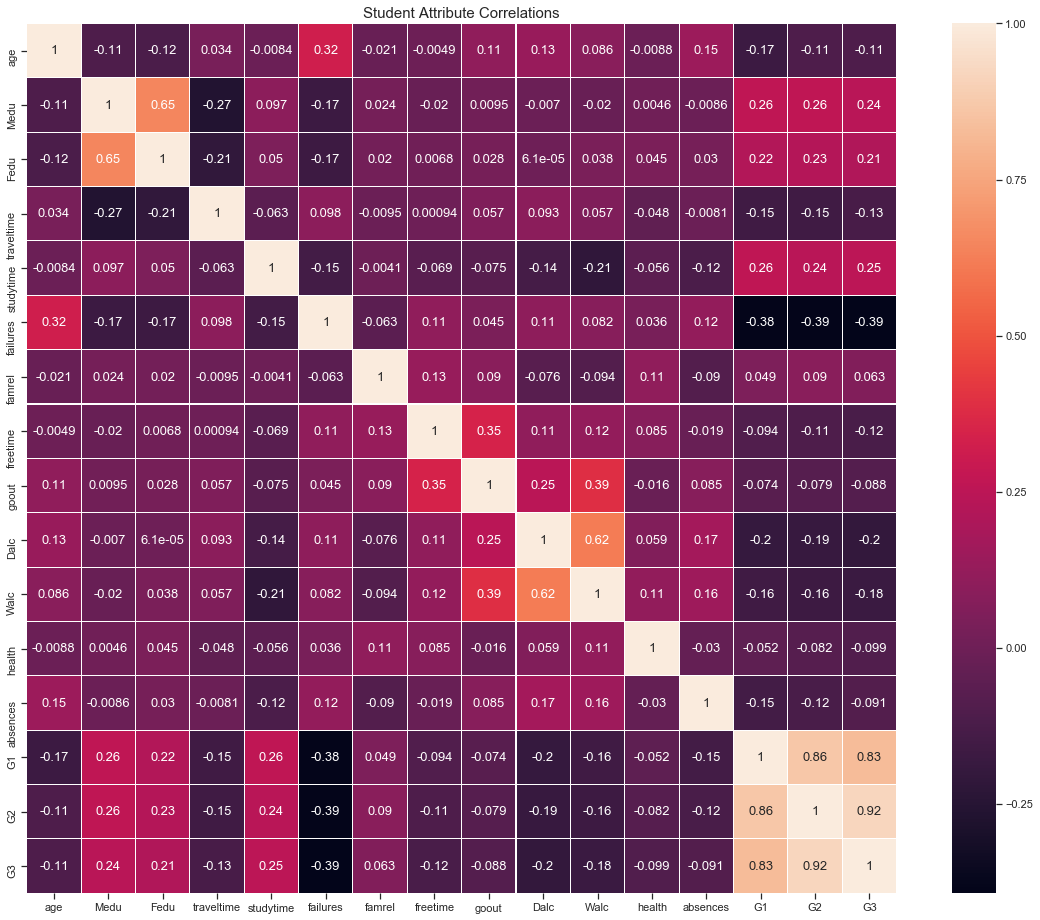

In [12]:
# Make the correlation matrix.
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(20, 16))

# Draw the heatmap using seaborn.
fig = sns.heatmap(corrmat, linewidths=0.1, vmax=1.0,
                  square=True, linecolor='white', annot=True, annot_kws={"size": 13})
plt.title('Student Attribute Correlations', size=15)
figure = fig.get_figure()
figure.savefig('output.png')

plt.show()

The lighter colored squares indicate higher correlations than the darker purple colors. This verifies that the attributes we mentinoned earlier, age, travel time, free time, going out with friends, workday/weekend alcohol consumption. and absences are highly correlated with Walc/Dalc.

## For the purpose of this analysis, the data will be manipulated in such that plotting the data will allow for easier data visualization.  
First, the binary answers to the surver are changed to numerical 0's and 1's.  
Then, the ordinal answers are changed to dummy data. This means that all the responses are now included in the columns, but they will be filled with 0's (dummies) unless the student indicated that category as their answer to the survey (marked here as 1's). 

In [13]:
# make all the binary outcomes into numbers 0 and 1
# make address into a binary outcome (Rural = 0 and Urban = 1)
df_binary = pd.DataFrame()
df_binary['address'] = df['address'].map({'R': 0, 'U': 1})
# Pstatus- Parent's cohabitation status ('A' - living apart=0 and 'T' - living together=1)
df_binary['Pstatus'] = df['Pstatus'].map({'A': 0, 'T': 1})
# schoolsup- Extra educational support (binary: yes or no)
df_binary['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
# famsup- Family educational support (binary: yes or no)
df_binary['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
# paid- Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
df_binary['paid'] = df['paid'].map({'no': 0, 'yes': 1})
# activities- Extra-curricular activities (binary: yes or no)
df_binary['activities'] = df['activities'].map({'no': 0, 'yes': 1})
# nursery- Attended nursery school (binary: yes or no)
df_binary['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
# higher- Wants to take higher education (binary: yes or no)
df_binary['higher'] = df['higher'].map({'no': 0, 'yes': 1})
# internet- Internet access at home (binary: yes or no)
df_binary['internet'] = df['internet'].map({'no': 0, 'yes': 1})
# romantic- With a romantic relationship (binary: yes or no)
df_binary['romantic'] = df['romantic'].map({'no': 0, 'yes': 1})
df_binary['sex'] = df_numerical['sex']
df_binary['Dalc'] = df_numerical['Dalc']
df_binary['Walc'] = df_numerical['Walc']

# make dummies to turn categorical data into numbers. 0 means it is not that category, 1 means that's what the student indicated
df_numerical2 = df[['school', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsize']]
df_numerical2 = pd.get_dummies(df_numerical2, columns=[
                               'school', 'Mjob', 'Fjob', 'reason', 'guardian', 'famsize'])

# add the two numerical dataframes together
results = pd.concat([df_binary, df_numerical2], axis=1)
results.head()

# add the results data frame with the numerical dataframe from before
total_data = pd.concat([df_binary, df_numerical], axis=1)

## We now have all of our data from the survey in numerical form!   
Therefore, we can now do some visualizations with all the data and can start to identify more trends for what attributed might be correlated together, and what might be good predictors to look at for predicting alcohol sumption in youth.

In [46]:
# melt the data to visualize weekend alcohol consumption compared to other variables
df_melt_Walc = results.melt(id_vars=['sex', 'Walc'])
df_melt_group_Walc = df_melt_Walc.groupby(['variable', 'value', 'sex'])[
    'Walc'].mean().reset_index()

# Prediction time!
Attribute of interest: Walc, or the weekend alcohol consumption on a scale of 1-5, because it is more interesting (more students drink on weekends than weekdays so there is more of a variety to look at)

Classifier models we'll use:
Random Forest Classifier  

In [47]:
# get rid of outliers in age
df_under_20 = pd.DataFrame()
df_under_20 = df_numerical.copy()
df_under_20 = df_under_20.drop(['index'], axis=1)
df_under_20['age'] = df_under_20['age'].astype(float)
df_under_20 = df_under_20[df_under_20['age'] <= 20]

In [48]:
# Define outcome and predictors
y = df_under_20['Walc']
x = df_under_20.loc[:, ~df_under_20.columns.isin(['Walc', 'index'])]

# Create training and test sets
offset = int(x.shape[0] * 0.8)

# Put 80% of data in training set
x_train, y_train = x[:offset], y[:offset]

#  Put 20% in the test set
x_test, y_test = x[offset:], y[offset:]

# Random Forest

In [49]:
# base level random forest
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, x, y, cv=5)

array([0.50381679, 0.43076923, 0.47286822, 0.42635659, 0.51181102])

In [50]:
num_est = []
accuracy_rfc = []

for value in [100, 500, 700]:
    rfc = RandomForestClassifier(n_estimators=value)
    accuracy_rfc.append(np.mean(cross_val_score(
        rfc, x, y, scoring='accuracy', cv=5, n_jobs=-1)))
    num_est.append(value)

In [51]:
df_rfc_est = pd.DataFrame(accuracy_rfc, columns=['accuracy'])
df_rfc_est['n_estimators'] = num_est
df_rfc_est.sort_values(by=['accuracy'], ascending=False)

,accuracy,n_estimators
1,0.503043,500
0,0.490687,100
2,0.489076,700


In [54]:
max_depth = []
accuracy_rfc = []

for values in [10, 15, 20, 50]:
    rfc = RandomForestClassifier(n_jobs=-1, max_depth=value, n_estimators=500)
    accuracy_rfc.append(np.mean(cross_val_score(
        rfc, x, y, cv=5, scoring='accuracy')))
    max_depth.append(values)

In [55]:
df_rfc_mxdep = pd.DataFrame(accuracy_rfc, columns=['accuracy'])
df_rfc_mxdep['max_depth'] = max_depth
df_rfc_mxdep.sort_values(by=['accuracy'], ascending=False)

,accuracy,max_depth
3,0.509185,50
0,0.503068,10
2,0.501540,20
1,0.495254,15


Though the best numbers of max_depth and n_estimators change each time you run the notebook (because it chooses different train and test sets each time), for this time, it seems like it is best with max_depth of 15 and n_est of 100.

In [56]:
rfc = RandomForestClassifier(max_depth=50, n_estimators=500)
cross_val_score(rfc, x, y, cv=5)

array([0.53435115, 0.46923077, 0.50387597, 0.46511628, 0.50393701])

In [57]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,1))
mlp.fit(x, y)

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [58]:
# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,10))
mlp.fit(x, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)